# Agro Foresterie

variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::152160
bounding_box: (-1784000, 1356000, -1140000, 1863000)
grid_res: [250, 250]


Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth in Senegal')

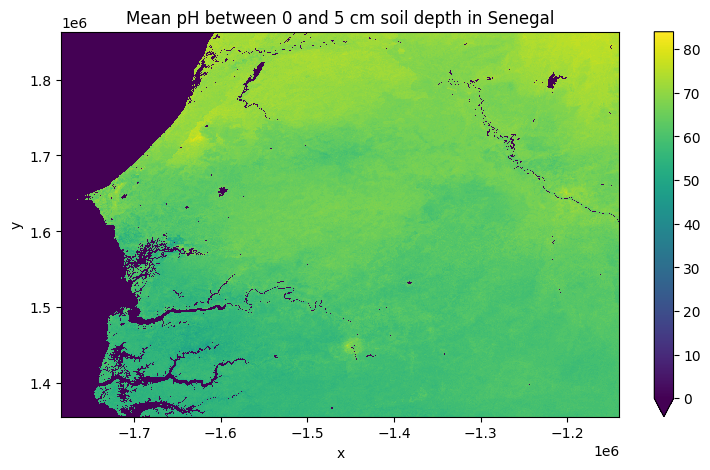

In [2]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(
    service_id="phh2o",
    coverage_id="phh2o_0-5cm_mean",
    west=-1784000,
    south=1356000,
    east=-1140000,
    north=1863000,
    crs="urn:ogc:def:crs:EPSG::152160",
    output="test.tif",
)

# show metadata
for key, value in soil_grids.metadata.items():
    print(f"{key}: {value}")


# plot data
data.plot(figsize=(9, 5), vmin=0)
plt.title("Mean pH between 0 and 5 cm soil depth in Senegal")

In [1]:
# lien entre R et python pour avoir hisafer
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

hisafe = importr('hisafer',lib_loc="/home/pol/R/x86_64-pc-linux-gnu-library/4.3")  


# Example of how you might use it (conceptual)
def setup_hisafe_simulation():
    # Set up simulation parameters
    robjects.r('''
        # R code for Hi-sAFe setup would go here
        # This is where you would put your actual Hi-sAFe R commands
    ''')

In [3]:
# Required installations:
# !pip install rpy2 soilgrids matplotlib seaborn pandas

# Import necessary modules
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
from soilgrids import SoilGrids
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize hisafer and required R packages
utils = importr('utils')
hisafer = importr('hisafer')

# Function to get soil data from SoilGrids
def get_soil_data(lat, lon):
    sg = SoilGrids()
    soil_data = sg.location(lat=lat, lon=lon)
    return soil_data

# Example GPS coordinates
latitude = 45.0
longitude = 3.0

# Get soil data for the location
soil_data = get_soil_data(latitude, longitude)
print("Soil Data:", soil_data)

# Refined Inputs
crops = ['wheat', 'corn', 'barley']  # Added more crops
trees = ['oak', 'pine', 'cedar']     # Added more trees
years = 10                           # Extended simulation duration

# Prepare hisafer inputs
ro.r('library(hisafer)')

# Create and run simulation with hisafer
ro.r('''
  # Define simulation parameters with more details
  params <- list(
    coordinates = c({lat}, {lon}),
    crops = c({crops}),
    trees = c({trees}),
    years = {years},
    soil_data = list(
      ph = {ph},
      sand = {sand},
      silt = {silt},
      clay = {clay}
    )
  )

  # Initialize simulation
  sim <- initSimulation(params)
  
  # Run simulation
  result <- runSimulation(sim)
  result_df <- as.data.frame(result)
  print(result_df)
'''.format(lat=latitude, lon=longitude, 
           crops=', '.join([f'"{c}"' for c in crops]), 
           trees=', '.join([f'"{t}"' for t in trees]),
           years=years,
           ph=soil_data['phh2o'][0]['mean'],
           sand=soil_data['sand'][0]['mean'],
           silt=soil_data['silt'][0]['mean'],
           clay=soil_data['clay'][0]['mean']))

# Get the results from R and convert to a pandas DataFrame
result_df = ro.r('result_df')
result_df = pd.DataFrame(np.array(result_df), columns=result_df.colnames)

# Data Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=result_df, x='Year', y='Yield', hue='Crop')
plt.title('Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (tons/hectare)')
plt.legend(title='Crop Type')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=result_df, x='Year', y='Growth', hue='Tree')
plt.title('Tree Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Tree Height (m)')
plt.legend(title='Tree Type')
plt.grid(True)
plt.show()


AttributeError: 'SoilGrids' object has no attribute 'location'

In [1]:
# Load the rpy2 IPython extension
%load_ext rpy2.ipython

In [18]:
%%R #Commande magique pour exécuter du R
#Librairie HISAFE pour R
library(hisafer)

tables<-hip_params()
head(tables)

# Display column names to locate the relevant fields
colnames(tables)
# Extract and display name and definition columns
result <- tables[, c("name", "definition","unit")]
print(result,n=25)

# A tibble: 749 × 3
   name                definition                                          unit 
   <chr>               <chr>                                               <chr>
 1 nbSimulations       "Number of simulations (i.e. number of years to si…  <NA>
 2 simulationYearStart "Simulation year start. This year must be present … "Yea…
 3 simulationDayStart  "Simulation day of year start. Care must be taken … "DOY"
 4 simulationNbrDays   "Number of days per simulation to run (separated w… "day…
 5 saveProjectOption   "Option to save project file at end of simulation,… "0 =…
 6 projectFileName     "The name of the prj file (exported by a previous …  <NA>
 7 debugMode           "If 1, prints daily outputs to log file. If 0, onl…  <NA>
 8 sticsReport         "If 1, a STICS simulation report is exported for e…  <NA>
 9 mainCropSpecies     "Name of the main alley crop plt file. Crop sucess…  <NA>
10 interCropSpecies    "Name of the interCrop plt file for the \"leave ar…  <NA>
11 mainC

In [6]:
import os
print(os.getcwd())

/home/pol/myenv
